In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data Explanation
**Data Extraction:** \
Extract complex data from binary file obtained from the experiment.
Separate data into magnitude and phase for each receiver antenna.
Create four CSV files per raw file (magnitude and phase for each antenna).

**Preprocessing:** \
Use either the magnitude or phase files for Machine Learning (ML) processing.
Remove noise and combine files from the two antennas into a single CSV file.

**Data Labeling:** \
Combine multiple data files of the same class (collected five times for each respiration simulation).
Label the combined data.

**Dataset Creation:** \
Create a single dataset containing all labeled classes.
Use this dataset as input for ML training.

# Code Exaplanation

I will be testing the single dataset, created after the data processing stage to find the most accurate model for predictions. I will be testing the following Machine Learning algorithms:
- Decision Tree
- K-Nearest Neighbour
- Logistic Regression
- Multilayer Perceptron
- XGBoost

# Tasks to Evaluate Models
- Confusion Matrix & Accuracy of Model:
- Confusion Matrix provides information on True/False Positives & Negatives
- This allows us to see how many predictions the model got right and wrong for each target variable
- Here our target variables are breathing types: normal, fast, deep

In [2]:
df = pd.read_csv("final_dataset.csv", header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084
5923,normal,0.528899,0.514933,0.495148,0.469974,0.440650,0.407663,0.370505,0.331123,0.291945,...,-0.586660,-0.697868,-0.951606,-1.238830,-1.586808,-1.746881,-1.370055,-0.713014,0.095732,0.747595
5924,normal,2.230957,2.251140,2.238557,2.220130,2.226209,2.231938,2.244854,2.207000,2.036606,...,0.012353,0.061649,0.112048,0.164425,0.218303,0.275925,0.340401,0.409471,0.481249,0.553745
5925,normal,0.393646,0.441858,0.451821,0.489278,0.623203,0.785473,0.996655,1.096191,0.859012,...,1.373652,1.362197,1.347655,1.330393,1.307430,1.284495,1.268413,1.256286,1.245325,1.233995
5926,normal,-0.427719,-0.458694,-0.471275,-0.467682,-0.445248,-0.409703,-0.365726,-0.320233,-0.283771,...,2.302380,2.061841,1.791268,1.512744,1.232491,0.984045,0.816640,0.707544,0.627199,0.571930
5927,normal,0.348370,0.113400,-0.199810,-0.509344,-0.620985,-0.612280,-0.585864,-0.546487,-0.534530,...,-0.685645,-0.628024,-0.557481,-0.484670,-0.415663,-0.360033,-0.336013,-0.333103,-0.332179,-0.338598


## Feature Extraction
- Will be making predictions using the the features of our data:

In [3]:
from scipy.fft import fft
from scipy.stats import kurtosis, skew

print(df.shape)

(5928, 4085)


In [4]:
# Function to extract features of each row
def extract_features(subcarrier_data):
    mean = np.mean(subcarrier_data)
    median = np.median(subcarrier_data)
    std = np.std(subcarrier_data)
    min_val = np.min(subcarrier_data)
    max_val = np.max(subcarrier_data)
    kurto = kurtosis(subcarrier_data)
    skewness = skew(subcarrier_data)
    
    fft_vals = fft(subcarrier_data)
    fft_magnitude = np.abs(fft_vals)
    fft_mean = np.mean(fft_magnitude)
    fft_std = np.std(fft_magnitude)

    return [mean, median, std, min_val, max_val, kurto, skewness, fft_vals, fft_magnitude, fft_mean, fft_std]

In [5]:
# Create Dataframe of features for each row
features_data = df.iloc[:, 1:]
features = features_data.apply(lambda row: extract_features(row.values), axis=1, result_type="expand")
features_df = pd.DataFrame(features)

In [6]:
labels = df.iloc[:, 0]
features_df["label"] = labels

# Change Labels
features_df = features_df.rename(columns={0: "mean", 1: "median", 2: "std", 3: "min_val",
                            4: "max_val", 5: "kurtosis", 6: "skewness", 7: "fft_vals",
                            8: "fft_magnitude", 9: "fft_mean", 10: "fft_std"})

feature_names = ["mean", "median", "std", "min", "max","kurto", "skewn" "fft_mean", "fft_std"]

# Features Explained
- Mean: Average value of signal
- Median: Middle value of signal
- Standard Deviation: Variability of signal
- Minimum Value: Smallest value in signal
- Maximum Value: Largest value in signal
- Kurtosis: Tail of signal distribution
- Skewness: Asymmetry of signal distribution
- FFT Mean: Average value of signal's frequency compnents
- FFT Std : Variability of signal's frequency compnents

In [7]:
#features_df.to_csv("row_feature_extraction.csv")

In [8]:
print(features_df.iloc[1])

mean                                                     -0.000385
median                                                   -0.000298
std                                                       0.015643
min_val                                                  -0.065836
max_val                                                   0.051598
kurtosis                                                  0.833623
skewness                                                  0.057642
fft_vals         [(-1.572589848859074-0j), (2.2834391381813277-...
fft_magnitude    [1.572589848859074, 2.668843650554384, 3.10821...
fft_mean                                                  0.436199
fft_std                                                    0.89985
label                                                         deep
Name: 1, dtype: object


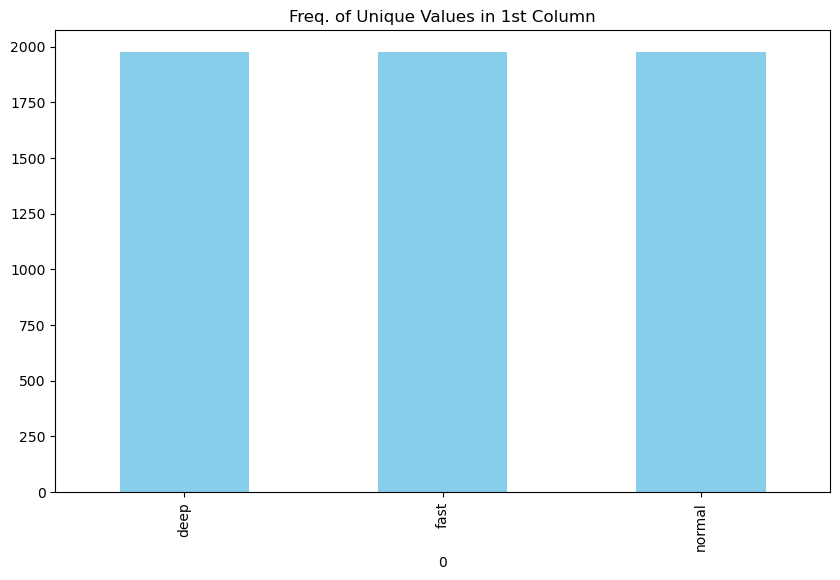

In [9]:
unique_values = df[0].value_counts()
plt.figure(figsize=(10,6))
unique_values.plot(kind="bar", color="skyblue")
plt.title("Freq. of Unique Values in 1st Column")
plt.show()

# Prepare Data
- X = predictors (features): drop label, fft_vals, fft_magnitude
- label: target variable
- fft_vals & fft_magnitude: does not fit in models
- Y = target variable

In [10]:
from sklearn.preprocessing import LabelEncoder

unique_labels = [i for i in df[0].unique()]

# Predictors
x = features_df.drop(columns=["label", "fft_vals", "fft_magnitude"])

# Target Variable
y = features_df["label"]

#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# features used for predictions
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mean      5928 non-null   float64
 1   median    5928 non-null   float64
 2   std       5928 non-null   float64
 3   min_val   5928 non-null   float64
 4   max_val   5928 non-null   float64
 5   kurtosis  5928 non-null   float64
 6   skewness  5928 non-null   float64
 7   fft_mean  5928 non-null   float64
 8   fft_std   5928 non-null   float64
dtypes: float64(9)
memory usage: 416.9 KB


In [12]:
# unique labels: use to label confusion matrix
unique_labels

['deep', 'fast', 'normal']

# Decision Tree
- Supervised ML model: learns from labeled data, both input features and target values provided
- Splits data into subsets based on feature values. Tree-like structure
- Each node is a feature and each branch a decision. Keep going until no more decisions

              precision    recall  f1-score   support

        deep       1.00      1.00      1.00      1976
        fast       0.50      0.99      0.66      1976
      normal       0.00      0.00      0.00      1976

    accuracy                           0.66      5928
   macro avg       0.50      0.66      0.55      5928
weighted avg       0.50      0.66      0.55      5928

Decision Tree Accuracy 66.46423751686909 %
[[1976    0    0]
 [   0 1964   12]
 [   0 1976    0]]


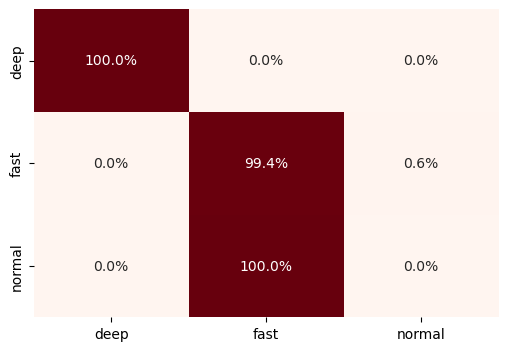

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Predictions
DT = DecisionTreeClassifier()
dt_y_pred = cross_val_predict(DT, x, y, cv=10)

# Confusion matrix
cm_dt = confusion_matrix(y, dt_y_pred, labels=unique_labels)

cmn_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]
cm_percent_dt = cmn_dt * 100

# Create % signs on confusion matrix
annotations = np.asarray([['{:.1f}%'.format(value) for value in row] for row in cm_percent_dt])

# Plot confusion matrix: with %
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_percent_dt, annot=annotations, fmt='', cbar=False, cmap='Reds',
            xticklabels=unique_labels, yticklabels=unique_labels)

print(classification_report(y, dt_y_pred))
print("Decision Tree Accuracy", (accuracy_score(y, dt_y_pred)*100),"%")
print(cm_dt)

- Deep: 100% of predictions correctly predicted deep breathing
- Fast: 99.4% of predictions correctly predicted fast breathing. Tiny amount predicted false normal
- Normal: 100% of predictions wrongly predicted fast breathing

## K-Nearest Neighbour
- Supervised ML model: learns from labeled data, both input features and target values provided
- Makes predictions by finding the "k" closest data points (neighbors) in the training set
- Makes decisions based on these neighbors

              precision    recall  f1-score   support

        deep       1.00      1.00      1.00      1976
        fast       0.50      0.65      0.56      1976
      normal       0.50      0.34      0.41      1976

    accuracy                           0.67      5928
   macro avg       0.66      0.67      0.66      5928
weighted avg       0.66      0.67      0.66      5928

KNN Accuracy 66.51484480431849 %
[[1976    0    0]
 [   0 1288  688]
 [   0 1297  679]]


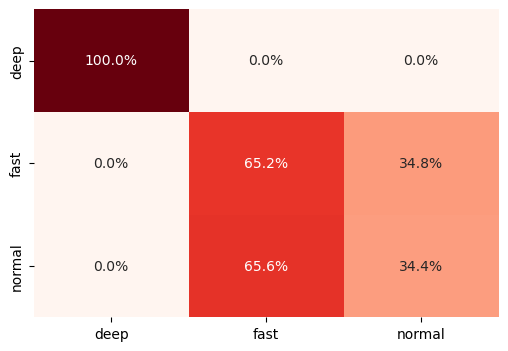

In [14]:
# Predictions
KNN = KNeighborsClassifier(n_neighbors=5)
knn_y_pred = cross_val_predict(KNN, x, y, cv=10)

# Confusion matrix:
cm_knn = confusion_matrix(y, knn_y_pred, labels=unique_labels)

cmn_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
cm_percent_knn = cmn_knn * 100

# Create % signs on confusion matrix
annotations = np.asarray([['{:.1f}%'.format(value) for value in row] for row in cm_percent_knn])

# Plot conusion matrix: with %
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_percent_knn, annot=annotations, fmt='', cbar=False, cmap='Reds',
            xticklabels=unique_labels, yticklabels=unique_labels)

print(classification_report(y, knn_y_pred))
print("KNN Accuracy", (accuracy_score(y, knn_y_pred)*100),"%")
print(cm_knn)

- Deep: 100% correctly predicted deep breathing
- Fast: Almost 2/3 predicted correct fast. 1/3 predicted false normal
- Normal: Almost 1/3 predicted correct normal. 2/3 predicted false fast

## Logistic Regression
- Supervised ML model: learns from labeled data, both input features and target values provided
- Used for binary classification tasks predicting either: True or False = 1 or 0
- Here we have 3 target variables. In each scenraion True = Correct, False = Anything other than correct
- E.g for deep, 1 = predicts deep & 0 = predicts normal or fast

              precision    recall  f1-score   support

        deep       1.00      1.00      1.00      1976
        fast       0.50      0.47      0.48      1976
      normal       0.50      0.53      0.51      1976

    accuracy                           0.66      5928
   macro avg       0.66      0.66      0.66      5928
weighted avg       0.66      0.66      0.66      5928

Logistic Regression Accuracy 66.48110661268556 %
[[1976    0    0]
 [   0  922 1054]
 [   0  933 1043]]


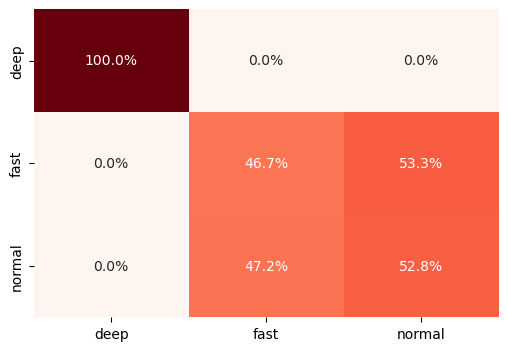

In [15]:
# Predictions
LGR = LogisticRegression(solver="lbfgs", max_iter=500)
lgr_y_pred = cross_val_predict(LGR, x, y, cv=10)

cm_lgr = confusion_matrix(y, lgr_y_pred, labels=unique_labels)

cmn_lgr = cm_lgr.astype('float') / cm_lgr.sum(axis=1)[:, np.newaxis]
cm_percent_lgr = cmn_lgr * 100

# Create % signs on confusion matrix
annotations = np.asarray([['{:.1f}%'.format(value) for value in row] for row in cm_percent_lgr])

# Plot conusion matrix: %
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_percent_lgr, annot=annotations, fmt='', cbar=False, cmap='Reds',
            xticklabels=unique_labels, yticklabels=unique_labels)

print(classification_report(y, lgr_y_pred))
print("Logistic Regression Accuracy", (accuracy_score(y, lgr_y_pred)*100), "%")
print(cm_lgr)

- Deep: 100% predicted correct deep
- Fast: Just below 1/2 predicted correct fast. Just above 1/2 predicted false normal
- Deep: Just above 1/2 predicted correct normal. Just below 1/2 predicted false fast

## Multilayer Perceptron
- Artificial neural network, with multiple layers of neurons
- Learns complex relationships between input features and target outputs through linear transformations and non-linear activations.

In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
import tensorflow as tf

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_encoded = label_encoder.transform(y)

# Define the MLP model
modelMLP = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# You can adjust this value as needed
learning_rate = 0.00001

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

modelMLP.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and save the history
history = modelMLP.fit(x_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stop])

C:\Users\humay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
134/134 - 3s - 23ms/step - accuracy: 0.3541 - loss: 1.0882 - val_accuracy: 0.3916 - val_loss: 1.0754
Epoch 2/100
134/134 - 0s - 3ms/step - accuracy: 0.4614 - loss: 1.0499 - val_accuracy: 0.5242 - val_loss: 1.0363
Epoch 3/100
134/134 - 0s - 3ms/step - accuracy: 0.5763 - loss: 1.0098 - val_accuracy: 0.6358 - val_loss: 0.9959
Epoch 4/100
134/134 - 0s - 3ms/step - accuracy: 0.6351 - loss: 0.9681 - val_accuracy: 0.6653 - val_loss: 0.9543
Epoch 5/100
134/134 - 0s - 3ms/step - accuracy: 0.6583 - loss: 0.9249 - val_accuracy: 0.6653 - val_loss: 0.9120
Epoch 6/100
134/134 - 0s - 3ms/step - accuracy: 0.6637 - loss: 0.8817 - val_accuracy: 0.6674 - val_loss: 0.8708
Epoch 7/100
134/134 - 0s - 3ms/step - accuracy: 0.6653 - loss: 0.8399 - val_accuracy: 0.6695 - val_loss: 0.8310
Epoch 8/100
134/134 - 0s - 3ms/step - accuracy: 0.6656 - loss: 0.8002 - val_accuracy: 0.6695 - val_loss: 0.7936
Epoch 9/100
134/134 - 0s - 3ms/step - accuracy: 0.6658 - loss: 0.7631 - val_accuracy: 0.6716 - val_loss

Epoch 74/100
134/134 - 1s - 5ms/step - accuracy: 0.6719 - loss: 0.4614 - val_accuracy: 0.6611 - val_loss: 0.4757
Epoch 75/100
134/134 - 0s - 3ms/step - accuracy: 0.6745 - loss: 0.4613 - val_accuracy: 0.6505 - val_loss: 0.4756
Epoch 76/100
134/134 - 0s - 4ms/step - accuracy: 0.6742 - loss: 0.4612 - val_accuracy: 0.6484 - val_loss: 0.4755
Epoch 77/100
134/134 - 0s - 3ms/step - accuracy: 0.6764 - loss: 0.4610 - val_accuracy: 0.6526 - val_loss: 0.4755
Epoch 78/100
134/134 - 0s - 3ms/step - accuracy: 0.6721 - loss: 0.4610 - val_accuracy: 0.6526 - val_loss: 0.4754
Epoch 79/100
134/134 - 1s - 4ms/step - accuracy: 0.6738 - loss: 0.4609 - val_accuracy: 0.6505 - val_loss: 0.4753
Epoch 80/100
134/134 - 1s - 4ms/step - accuracy: 0.6773 - loss: 0.4608 - val_accuracy: 0.6463 - val_loss: 0.4754
Epoch 81/100
134/134 - 0s - 3ms/step - accuracy: 0.6754 - loss: 0.4608 - val_accuracy: 0.6484 - val_loss: 0.4752
Epoch 82/100
134/134 - 0s - 3ms/step - accuracy: 0.6768 - loss: 0.4606 - val_accuracy: 0.6484 - 

In [19]:
# Unique labels for y: y is now encoded [0, 1, 2] not ["deep", "fast", "normal"]
encoded_unique_labels = sorted(pd.Series(y_test_encoded).unique())
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(encoded_unique_labels)
print("Label Encoding Mapping:", mapping)

[0, 1, 2]
Label Encoding Mapping: {'deep': 0, 'fast': 1, 'normal': 2}


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       0.45      0.50      0.47       394
           2       0.45      0.40      0.42       404

    accuracy                           0.63      1186
   macro avg       0.63      0.63      0.63      1186
weighted avg       0.63      0.63      0.63      1186

Multilayer Perceptron accuracy 62.81618887015177 %
[[388   0   0]
 [  0 197 197]
 [  0 244 160]]


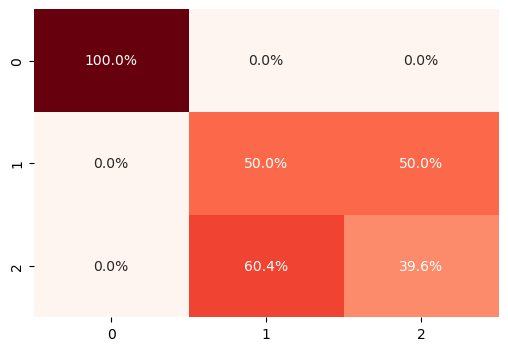

In [20]:
# Predict and evaluate the model
mp_y_pred = np.argmax(modelMLP.predict(x_test), axis=1)

cm_mp = confusion_matrix(y_test_encoded, mp_y_pred, labels=encoded_unique_labels)

cmn_mp = cm_mp.astype("float") / cm_mp.sum(axis=1)[:, np.newaxis]
cm_percent_mp = cmn_mp * 100

# Create % signs on confusion matrix
annotations = np.asarray([['{:.1f}%'.format(value) for value in row] for row in cm_percent_mp])

# Plot conusion matrix: %
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_percent_mp, annot=annotations, fmt='', cbar=False, cmap='Reds',
            xticklabels=encoded_unique_labels, yticklabels=encoded_unique_labels)


print(classification_report(y_test_encoded, mp_y_pred))
print("Multilayer Perceptron accuracy", (accuracy_score(y_test_encoded, mp_y_pred) * 100), "%")
print(cm_mp)

- 0 = Deep: 100% correctly predicted deep
- 1 = Fast: Almost 1/2 correctly predicted fast. Just below 1/2 wrongly predicted normal
- 2 = Normal: just above 35% correctly predicted normal. just below 65% wrongly predicted fast

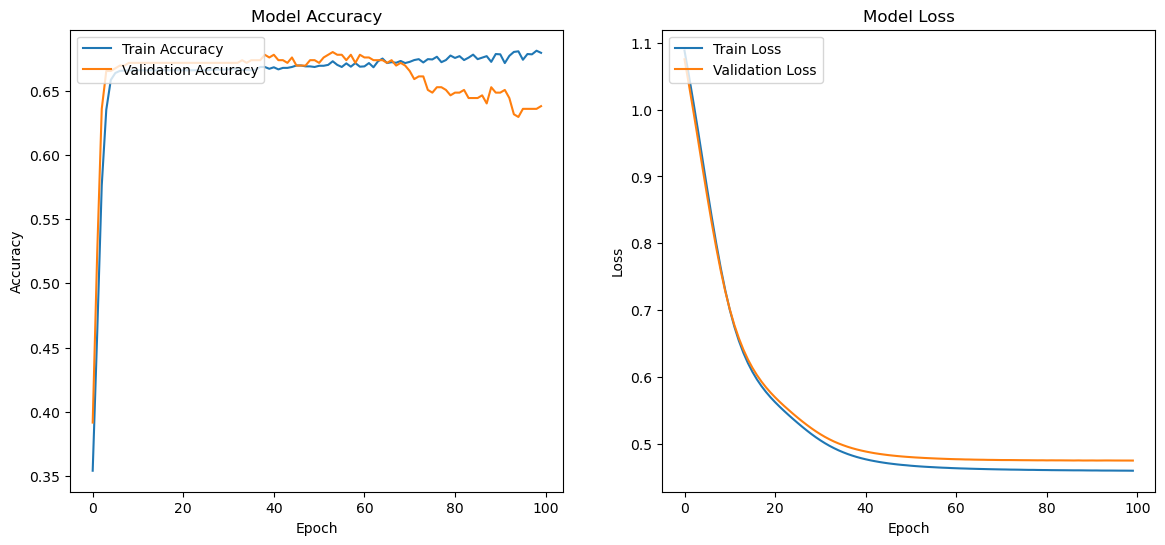

In [21]:
# Plot the learning curve for accuracy
plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

## XGBoost
- Supervised machine learning algorithm
- Based on the concept of gradient boosting: sequential models which attempt to correct previous models' errors
- Collection of decision trees where each tree corrects the errors of the previous ones

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       0.16      0.16      0.16       394
           2       0.16      0.15      0.16       404

    accuracy                           0.43      1186
   macro avg       0.44      0.44      0.44      1186
weighted avg       0.43      0.43      0.43      1186

XGBOOST accuracy: 43.3389544688027 %
[[388   0   0]
 [  0  64 330]
 [  0 342  62]]


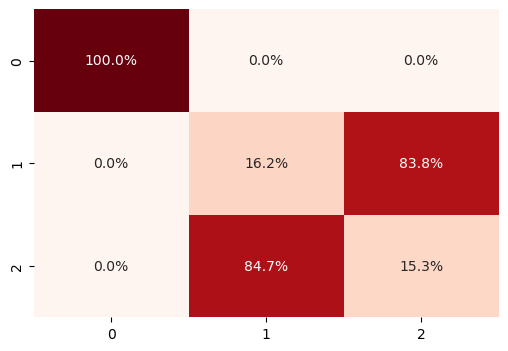

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(np.unique(y)))

xgb_model.fit(x_train, y_train_encoded)
xgb_y_pred = xgb_model.predict(x_test)

cm_xgb = confusion_matrix(y_test_encoded, xgb_y_pred, labels=encoded_unique_labels)

cmn_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]
cm_percent_xgb = cmn_xgb * 100

# Create % signs on confusion matrix
annotations = np.asarray([['{:.1f}%'.format(value) for value in row] for row in cm_percent_xgb])

# Plot conusion matrix: %
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_percent_xgb, annot=annotations, fmt='', cbar=False, cmap='Reds',
            xticklabels=encoded_unique_labels, yticklabels=encoded_unique_labels)

print(classification_report (y_test_encoded, xgb_y_pred))
print("XGBOOST accuracy:", (accuracy_score(y_test_encoded, xgb_y_pred)*100),"%")
print(cm_xgb)

- 0 = Deep: 100% correctly predicted deep
- 1 = Fast: almost 1/6 correctly predicted fast. almost 5/6 wrongly predicted normal
- 2 = Normal: almost 1/6 correctly predicted normal. almost 5/6 wrongly predicted fast

# Comparing Results: Accuracy
5/6 models achieved roughly 66% accuracy, meaning they correctly predicted 2 out of 3 instances.\
This relatively "low" accuracy could be attributed to potential errors in the data.\

Another factor could be the nature of breathing characteristics:\
- The confusion matrices show that Deep breathing consistently achieves a 100% true positive rate, while Fast and Normal do not.
- It’s possible that the features of Fast and Normal breathing are more similar to each other, making them harder to distinguish. Whereas Deep breathing is more distinct, therefore easier to predict accurately.

In [24]:
accuracy_score_dict = {
    "Decision Tree Accuracy" : accuracy_score(y, dt_y_pred)*100,
    "KNN Accuracy" : accuracy_score(y, knn_y_pred)*100,
    "Logistic Regression Accuracy" : accuracy_score(y, lgr_y_pred)*100,
    "Multilayer Perceptron accuracy" : accuracy_score(y_test_encoded, mp_y_pred)*100,
    "XGBOOST" : accuracy_score(y_test_encoded, xgb_y_pred)*100,
}

print({k: v for k, v in sorted(accuracy_score_dict.items(), key=lambda item: item[1], reverse=True)})

{'KNN Accuracy': 66.51484480431849, 'Logistic Regression Accuracy': 66.48110661268556, 'Decision Tree Accuracy': 66.46423751686909, 'Multilayer Perceptron accuracy': 62.81618887015177, 'XGBOOST': 43.3389544688027}


- Most Accurate Model: K-Nearest Neighbour
- Least Accurate Model: XGBoost (by a good bit)
- All have similar accuracies except for XGBoost

# Comparing Results: Confusion Matrix
**Why XGBoost model's accuracy significantly lower:**
- The confusion matrix for XGBoost shows that both Fast and Normal breathing classes have a low number of true positives.
- Each class was correctly predicted only 16% of the time.
- Other models demonstrated better true positive rates for Fast and Normal breathing.
- E.g. Decision Tree model, Normal breathing had a lower true positive rate, but Fast breathing had a higher rate.
- No other model had two classes with true positive rates significantly below 50%.